In [1]:
import matplotlib.pyplot as plt
import os

In [2]:
# Load your dataset from the specified path
image_sourcepath = '/hdd/hdd1/lyj/cub200/images'

In [3]:
image_classes     = sorted([x for x in os.listdir(image_sourcepath) if '._' not in x], key=lambda x: int(x.split('.')[0]))

In [4]:
image_list        = {int(key.split('.')[0])-1:sorted([image_sourcepath+'/'+key+'/'+x for x in os.listdir(image_sourcepath+'/'+key) if '._' not in x]) for key in image_classes}
image_list        = [[(key,img_path) for img_path in image_list[key]] for key in image_list.keys()]

In [5]:
imb_factor = 0.1

In [6]:
def get_img_num_per_cls(img_max, cls_num, imb_factor): # imb = 1, 0.5, 0.1               
    img_num_per_cls = []
    for cls_idx in range(cls_num):
        num = img_max * (imb_factor**(cls_idx / (cls_num - 1.0)))
        img_num_per_cls.append(int(num))

    return img_num_per_cls

In [7]:
# Truncate Dataset for LT Ratio
cls_num = len(image_list)
img_max = len(image_list[0]) - 10
img_num_per_cls = get_img_num_per_cls(img_max, cls_num, imb_factor) # img number를 점점 줄어들게 list

In [8]:
image_list = [images[:img_num] for images, img_num in zip(image_list, img_num_per_cls)]
image_list = [x for y in image_list for x in y]

In [9]:
### Dictionary of structure class:list_of_samples_with_said_class
image_dict    = {}
for key, img_path in image_list:
    if not key in image_dict.keys():
        image_dict[key] = []
    image_dict[key].append(img_path)

### Use the first half of the sorted data as training and the second half as test set
keys = sorted(list(image_dict.keys()))


In [10]:
train_image_dict = {key:image_dict[key] for key in keys}

In [11]:
# Calculate and store the number of instances for each class
class_instance_counts = {key: len(instances_list) for key, instances_list in image_dict.items()}
print(class_instance_counts)

{0: 50, 1: 49, 2: 48, 3: 48, 4: 44, 5: 41, 6: 46, 7: 46, 8: 45, 9: 45, 10: 44, 11: 44, 12: 43, 13: 43, 14: 42, 15: 42, 16: 41, 17: 41, 18: 40, 19: 40, 20: 39, 21: 39, 22: 38, 23: 38, 24: 37, 25: 37, 26: 37, 27: 36, 28: 36, 29: 35, 30: 35, 31: 34, 32: 34, 33: 34, 34: 33, 35: 33, 36: 32, 37: 32, 38: 32, 39: 31, 40: 31, 41: 31, 42: 30, 43: 30, 44: 30, 45: 29, 46: 29, 47: 29, 48: 28, 49: 28, 50: 28, 51: 27, 52: 27, 53: 27, 54: 26, 55: 26, 56: 26, 57: 25, 58: 25, 59: 25, 60: 24, 61: 24, 62: 24, 63: 24, 64: 23, 65: 23, 66: 23, 67: 23, 68: 22, 69: 22, 70: 22, 71: 21, 72: 21, 73: 21, 74: 21, 75: 20, 76: 20, 77: 20, 78: 20, 79: 20, 80: 19, 81: 19, 82: 19, 83: 19, 84: 18, 85: 18, 86: 18, 87: 18, 88: 18, 89: 17, 90: 17, 91: 17, 92: 17, 93: 17, 94: 16, 95: 16, 96: 16, 97: 16, 98: 16, 99: 15, 100: 15, 101: 15, 102: 15, 103: 15, 104: 15, 105: 14, 106: 14, 107: 14, 108: 14, 109: 14, 110: 14, 111: 13, 112: 13, 113: 13, 114: 13, 115: 13, 116: 13, 117: 12, 118: 12, 119: 12, 120: 12, 121: 12, 122: 12, 12

In [12]:
sorted_class_instance_counts = dict(sorted(class_instance_counts.items(), key=lambda item: item[1]))

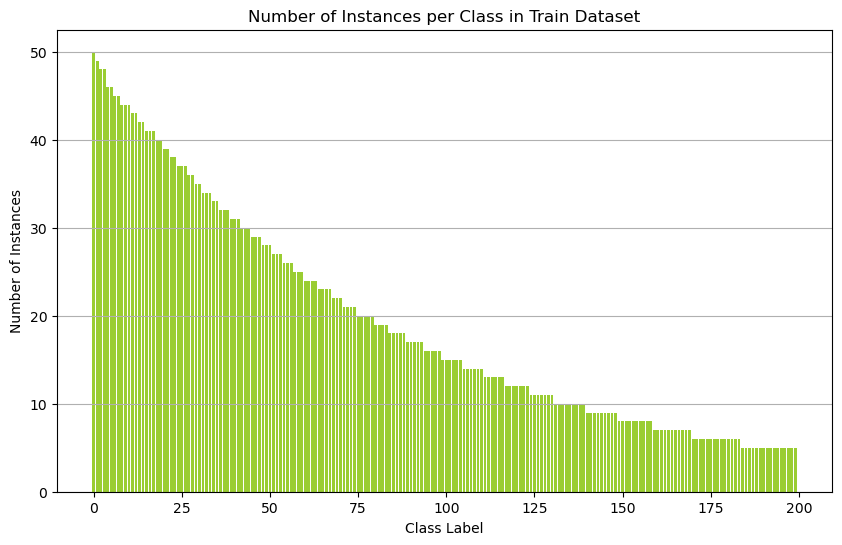

In [13]:
import matplotlib.pyplot as plt

sorted_class_instance_counts = dict(sorted(class_instance_counts.items(), key=lambda item: item[1], reverse=True))

# Renumber the classes based on the sorted order
renumbered_classes = {new_label: old_label for new_label, old_label in enumerate(sorted_class_instance_counts)}

# Create a new dictionary with renumbered classes
renumbered_class_instance_counts = {new_label: sorted_class_instance_counts[old_label] for new_label, old_label in renumbered_classes.items()}

# Extract keys and values for plotting
class_labels = list(renumbered_class_instance_counts.keys())
instance_counts = list(renumbered_class_instance_counts.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(class_labels, instance_counts, color='yellowgreen')
plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Class in Train Dataset')
plt.grid(axis='y')

# Show the plot
plt.show()